In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [2]:
iris_data = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/Iris.csv")
iris_data = iris_data.drop('Id', axis = 1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


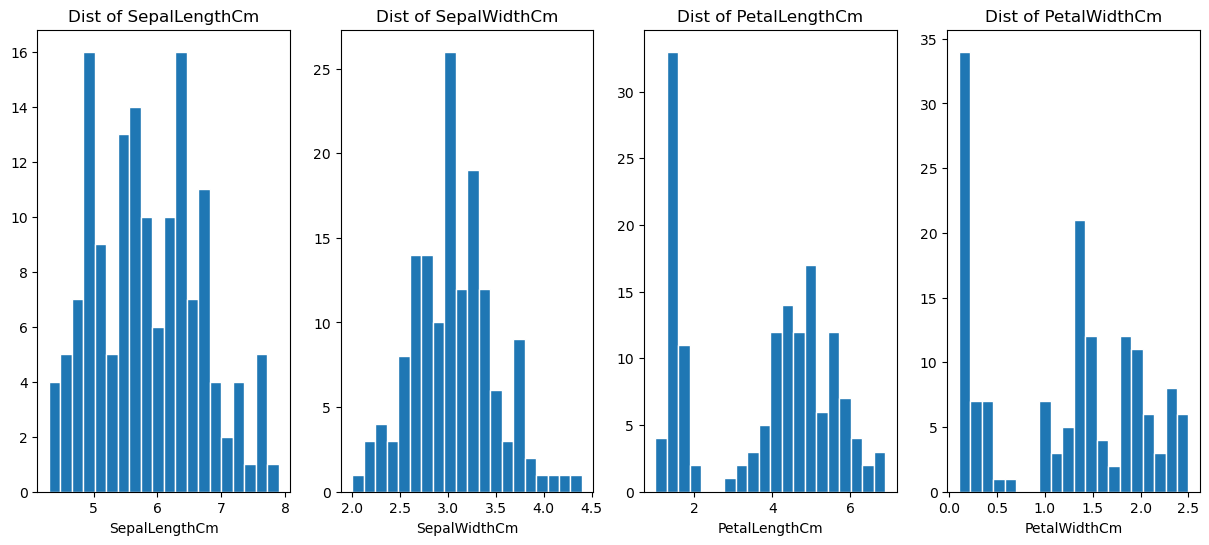

In [3]:
fig,ax = plt.subplots(1,4,figsize = (15,6))
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i,col in enumerate(cols):
    ax[i].hist(iris_data[col], edgecolor = 'w',bins = 20)
    ax[i].set_title(f'Dist of {col}')
    ax[i].set_xlabel(col)
plt.show()

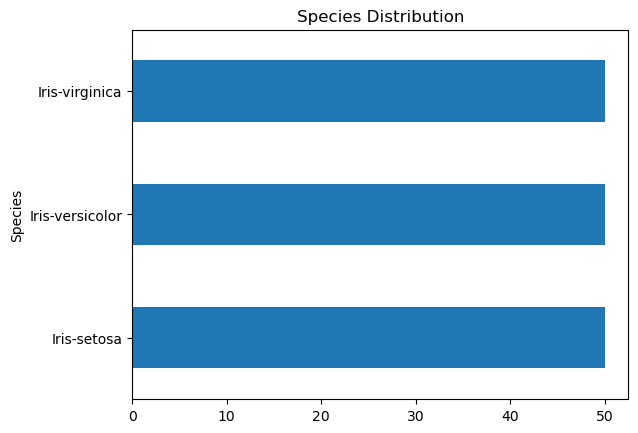

In [4]:
species = iris_data['Species'].value_counts()
species.plot.barh()
plt.title('Species Distribution')
plt.show()

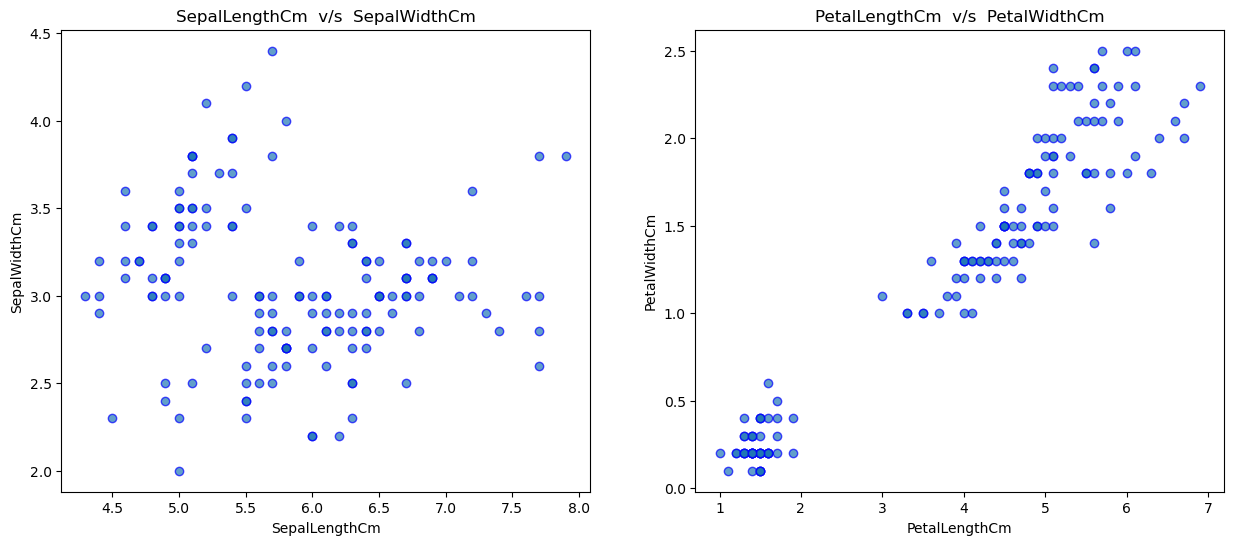

In [5]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
ax[0].scatter(iris_data.iloc[:,0], iris_data.iloc[:,1],alpha = 0.7,edgecolor = 'b')
ax[0].set_title('SepalLengthCm  v/s  SepalWidthCm')
ax[0].set_xlabel('SepalLengthCm')
ax[0].set_ylabel('SepalWidthCm')


ax[1].scatter(iris_data.iloc[:,2], iris_data.iloc[:,3],alpha = 0.7,edgecolor = 'b')
ax[1].set_title('PetalLengthCm  v/s  PetalWidthCm')
ax[1].set_xlabel('PetalLengthCm')
ax[1].set_ylabel( 'PetalWidthCm')
plt.show() 

In [6]:
X = iris_data.drop('Species', axis = 1)
y = iris_data['Species']

In [7]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
clf = SVC(kernel = 'linear', C=1)

In [8]:
param = {'C':[1,10,100,1000],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid = GridSearchCV(clf,param ,refit = True,verbose = 1,cv= 5,n_jobs = -1)
grid_search = grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [9]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [10]:
grid_search.best_score_

0.9888888888888889

In [11]:
y_pred = grid.predict(X_test)

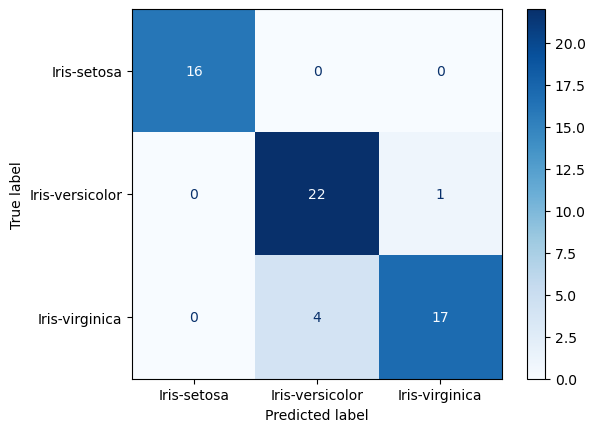

In [12]:
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels = grid.classes_)
disp.plot(cmap = plt.cm.Blues, ax =  plt.gca())

In [13]:
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.85      0.96      0.90        23
 Iris-virginica       0.94      0.81      0.87        21

       accuracy                           0.92        60
      macro avg       0.93      0.92      0.92        60
   weighted avg       0.92      0.92      0.92        60



In [14]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print('Accuracy of SVM with Hold out validation:\n',round(accuracy*100,2))

Accuracy of SVM with Hold out validation:
 96.67


In [15]:
X.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
33,5.5,4.2,1.4,0.2
50,7.0,3.2,4.7,1.4
88,5.6,3.0,4.1,1.3
148,6.2,3.4,5.4,2.3
69,5.6,2.5,3.9,1.1


In [16]:
new_data = np.array([[7.0, 3.2, 4.7, 1.4]])
new_df = pd.DataFrame(new_data, columns = X.columns)
y_pred = clf.predict(new_df)
print('Predicted class:', y_pred[0])

Predicted class: Iris-versicolor
